

---


**Google Drive와 Mount. 즉, Drive에 있는 파일들을 쓰겠다!.**

In [1]:
# rvis
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---


**드라이브 경로로 이동 후, YOLO_setup 폴더 생생성**

In [2]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [6]:
import os
os.mkdir("/content/drive/MyDrive/YOLO_setup2/")

In [8]:
%cd /content/drive/MyDrive/YOLO_setup2/

/content/drive/MyDrive/YOLO_setup2




---


**AlexeyAB의 darknet 패키지를 clone해준다. (YOLO 패키지 내려받기,)**

   **git clone은 다운로드 개념이므로 한번만 해주면 됩니다.**

In [9]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15490, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 15490 (delta 10), reused 18 (delta 8), pack-reused 15460
Receiving objects: 100% (15490/15490), 14.08 MiB | 8.25 MiB/s, done.
Resolving deltas: 100% (10398/10398), done.
Checking out files: 100% (2057/2057), done.




---


**shutil 모듈을 import 한 후,**


**YOLO_setup에 올려놓은 Pretrained model ( yolov4-tiny.conv.29 ) ,**

 **Configure 파일 ( yolov4-tiny-tpu.cfg ) ,**         

**Train data(학습 시킬 사진)들을 해당 경로에 복붙 해준다.** 

In [11]:
import shutil
shutil.copy("/content/drive/MyDrive/YOLO_setup2/yolov4-tiny.conv.29","/content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/yolov4-tiny.conv.29")

'/content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/yolov4-tiny.conv.29'

In [12]:
shutil.copy("/content/drive/MyDrive/YOLO_setup2/yolo-obj.cfg","/content/drive/MyDrive/YOLO_setup2/darknet/cfg/yolo-obj.cfg")

'/content/drive/MyDrive/YOLO_setup2/darknet/cfg/yolo-obj.cfg'

In [13]:
os.mkdir("/content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/obj")



---


**학습 데이터의 경로를 받아와 img_list에 저장하고, 학습 데이터가 몇장인지 출력**

In [19]:
from glob import glob

img_list = glob('/content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/obj/*.jpg')
len(img_list)

110



---


**train.txt에 학습 데이터들의 경로 써주기**

In [20]:
with open('/content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/train.txt', 'w') as f:   # train.txt 파일을 쓰기 모드(w)로 열기
    f.write('\n'.join(img_list) + '\n')  # img_list로 받아온 학습데이터들의 경로 써주기


In [21]:
with open('/content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/train.txt', 'r') as file:    # train.txt 파일을 읽기 모드(r)로 열기
    line = None    # 변수 line을 None으로 초기화
    while line != '':
        line = file.readline() 
        print(line)# trian.txt에 들은 내용 출력

/content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/obj/0016.jpg

/content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/obj/0014.jpg

/content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/obj/0013.jpg

/content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/obj/0015.jpg

/content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/obj/0012.jpg

/content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/obj/0011.jpg

/content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/obj/0008.jpg

/content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/obj/0009.jpg

/content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/obj/0010.jpg

/content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/obj/0007.jpg

/content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/obj/0006.jpg

/content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/obj/0004.jpg

/content/drive/MyDrive/YOLO_setup2/darkn



---


**Makefile에 OPENCV , GPU, CUDNN, CUDNN_HALF, LIBSO의 옵션들을 0에서 1로 바꿔 활성화 시켜준다.**

**옵션들을 설정해준 뒤, make 실행(옵션 적용)**

In [22]:
# hardware setting
%cd /content/drive/MyDrive/YOLO_setup2/darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile # module helping deeplearning
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile # make graphic card effective
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile
!make # apply changes

/content/drive/MyDrive/YOLO_setup2/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (itera



---


**학습 명령어 실행.**

---



**YOLO 학습 및 테스트 명령어는 이 형식으로 학습함**

**!./darknet detector train [data파일 경로] [cfg파일 경로] [pre-trained model 경로] 추가옵션**

**여기서 don`t show는 loss graph를 띄우지 않겠다는 옵션.( (colab에서 학습시킬 땐, don`t show 옵션 꼭 부여.)**

**이 옵션 이외에도 여러 옵션이 있음. (검색하면 다양하게 나오는데 필요한 경우 아니면 딱히 쓸일 없음)**

In [49]:
!./darknet detector train /content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/obj.data /content/drive/MyDrive/YOLO_setup2/darknet/cfg/yolo-obj.cfg /content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/yolov4-tiny.conv.29 -dont_show 

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.878873), count: 10, class_loss = 0.059173, iou_loss = 3.826582, total_loss = 3.885755 
 total_bbox = 540423, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.891000), count: 27, class_loss = 0.139268, iou_loss = 1.327418, total_loss = 1.466686 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.924141), count: 8, class_loss = 0.000005, iou_loss = 1.152035, total_loss = 1.152040 
 total_bbox = 540458, rewritten_bbox = 0.000000 % 

 Tensor Cores are used.
]2;3715/4000: loss=0.1 hours left=0.1
 3715: 0.114457, 0.074217 avg loss, 0.000026 rate, 1.222211 seconds, 237760 images, 0.130574 hours left
Loaded: 0.216891 seconds - performance bottleneck on CPU or Disk HDD/SSD
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.893344), count: 2



---
**imShow라는 이미지 출력 함수를 구성해줌. (이미지 출력을 위해 구성한 함수)**


In [50]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()



---
**학습 후 기록된 Loss / Iteration 그래프 출력**


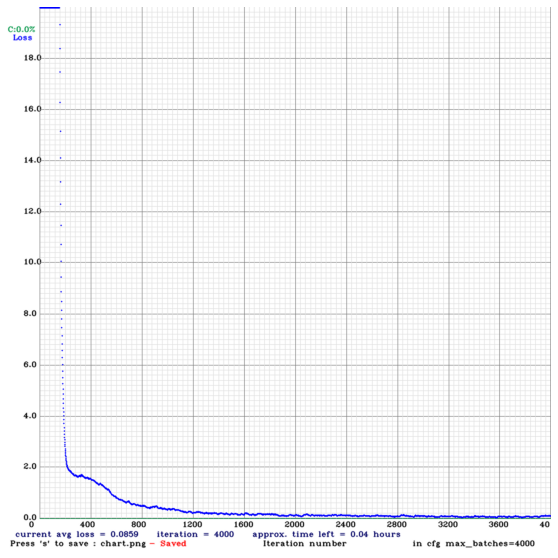

In [56]:
imShow('chart_yolo-obj.png')


---


**테스트 명령어 실행.**

---



**YOLO 학습 및 테스트 명령어는 이 형식으로 학습함**

**!./darknet detector test [data파일 경로] [cfg파일 경로] [학습된 weights 경로] [테스트 해볼 image 경로]**

**여기서 don`t show는 loss graph를 띄우지 않겠다는 옵션.**

**이 옵션 이외에도 여러 옵션이 있음. (검색하면 다양하게 나오는데 필요한 경우 아니면 딱히 쓸일 없음)**

In [54]:
!./darknet detector test /content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/obj.data /content/drive/MyDrive/YOLO_setup2/darknet/cfg/yolo-obj.cfg /content/drive/MyDrive/YOLO_setup2/darknet/backup/yolo-obj_4000.weights /content/drive/MyDrive/YOLO_setup2/darknet/build/darknet/x64/data/obj/0019.jpg 

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 4, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     



---
**테스트한 이미지 출력해서 확인해보기~**


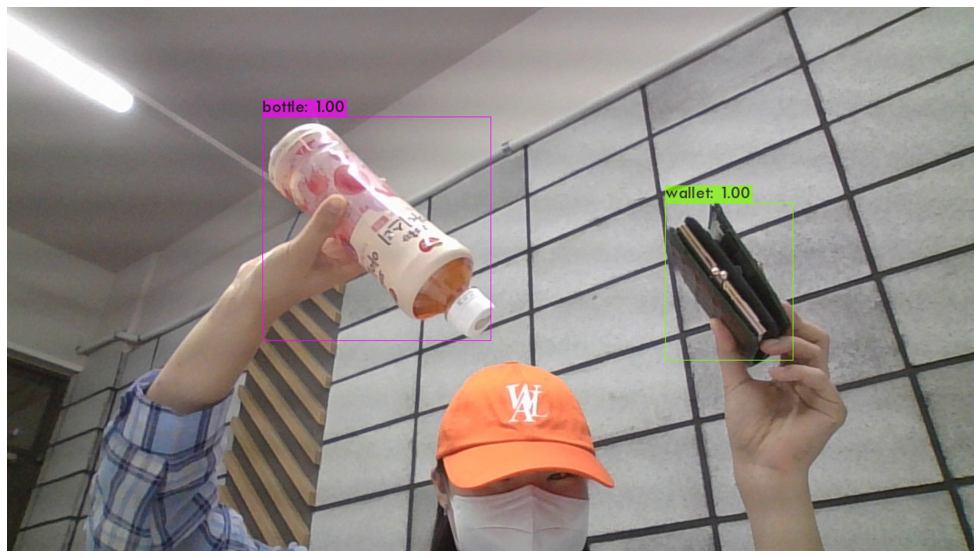

In [55]:
imShow('predictions.jpg')